In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [9]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

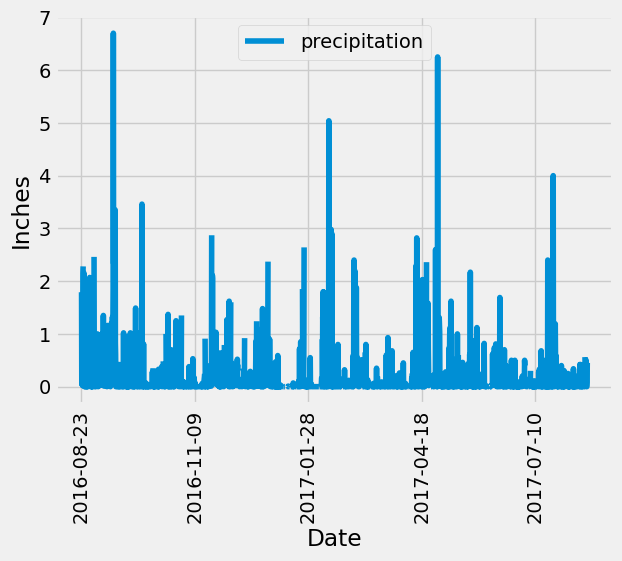

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365) 

# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(measurement.date,measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dp_df = pd.DataFrame(date_prcp, columns = ["date", "precipitation"]) 

# Sort the dataframe by date
df_by_date = dp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df_by_date.plot(x="date", y="precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df_by_date.describe()
print(summary_stats)

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
total_stations

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Station ID 'USC00519281" is the station with the greatest number of observations.

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]
station_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                        filter(measurement.station == most_active_station_id).all()
station_temps

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

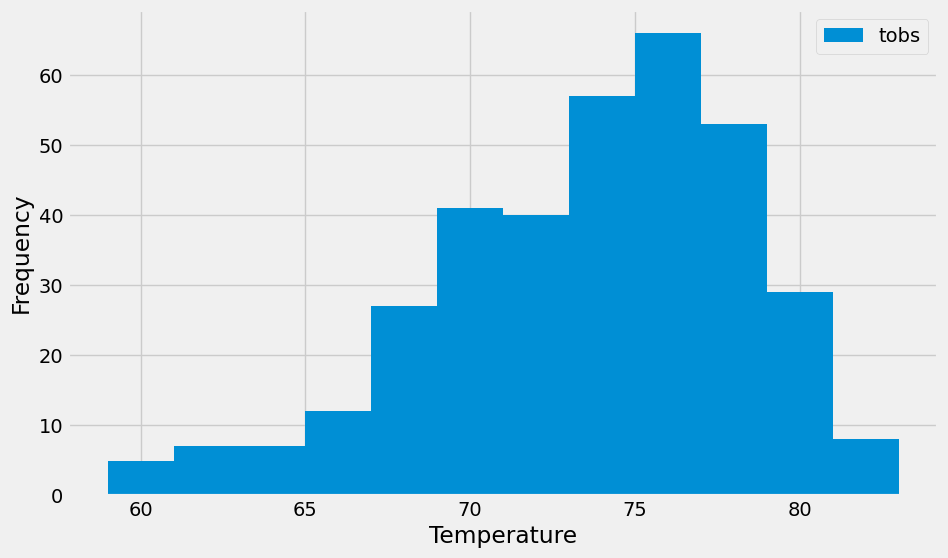

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_year_observations = session.query(measurement.tobs).\
                        filter(measurement.station == most_active_station_id).\
                        filter(measurement.date >= previous_year).all()

tobs_df = pd.DataFrame(recent_year_observations, columns=['tobs'])

tobs_df.plot.hist(bins=12, figsize=(10,6))
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [41]:
# Close Session
session.close()
